In [42]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
from skimage.color import rgb2gray


In [43]:
# Define the directory containing your photos
photos_directory = "D:/STUDY/Fouth Year/GP/test/Ibrahim/"

# Define the pattern to match image files (you can adjust this pattern if needed)
image_files_pattern = "*.bmp"

# Get a list of file paths matching the pattern
photo_paths = glob.glob(photos_directory + image_files_pattern)

# Display the list of photo paths
print("Photo paths:")
for path in photo_paths:
    print(path)

Photo paths:
D:/STUDY/Fouth Year/GP/test/Ibrahim\100__M_L_Index_finger.bmp
D:/STUDY/Fouth Year/GP/test/Ibrahim\100__M_L_Little_finger.bmp
D:/STUDY/Fouth Year/GP/test/Ibrahim\100__M_L_Middle_finger.bmp
D:/STUDY/Fouth Year/GP/test/Ibrahim\100__M_L_Ring_finger.bmp
D:/STUDY/Fouth Year/GP/test/Ibrahim\100__M_L_Thumb_finger.bmp
D:/STUDY/Fouth Year/GP/test/Ibrahim\100__M_R_Index_finger.bmp
D:/STUDY/Fouth Year/GP/test/Ibrahim\100__M_R_Little_finger.bmp
D:/STUDY/Fouth Year/GP/test/Ibrahim\100__M_R_Middle_finger.bmp
D:/STUDY/Fouth Year/GP/test/Ibrahim\100__M_R_Ring_finger.bmp
D:/STUDY/Fouth Year/GP/test/Ibrahim\100__M_R_Thumb_finger.bmp


In [44]:
# Define a dictionary to map finger names to numbers
finger_mapping = {'thumb': 0, 'index': 1, 'middle': 2, 'ring': 3, 'little': 4}
# Initialize lists to store image data and target labels
image_data = []
target_labels = []
for filename in os.listdir(photos_directory):
    if filename.endswith(".bmp"):
        subject_id, etc = filename.split('__')
        gender, lr, finger, _ = etc.split('_')
        gender = 0 if gender == 'M' else 1
        lr = 0 if lr =='L' else 1
        
        if finger == 'Thumb':
            finger = 0
        elif finger == 'Index':
            finger = 1
        elif finger == 'Middle':
            finger = 2
        elif finger == 'Ring':
            finger = 3
        elif finger == 'Little':
            finger = 4
        target_labels.append([subject_id, gender, lr, finger])
        path = photos_directory + filename
        img = Image.open(path) 
        if img.mode != 'RGB':
            img = img.convert('RGB')
        resized_photo = img.resize((90, 90))      
        img_np_array = np.array(resized_photo)
        gray_image = rgb2gray(img_np_array)
        gray_image = np.expand_dims(gray_image, axis=-1)
        real_photo = gray_image.astype(np.float32) / 255.  
        # print(path,real_photo.shape,real_photo.size)
        # plt.figure(figsize=(8, 4))
        # plt.subplot(1, 3, 1)
        # plt.imshow(real_photo.squeeze(),cmap='gray')
        image_data.append(real_photo)

# Convert the list of lists to a NumPy array
target_labels = np.array(target_labels)

# Convert lists to NumPy arrays
image_data = np.array(image_data)
target_labels = np.array(target_labels)

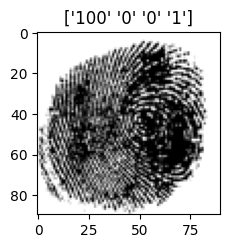

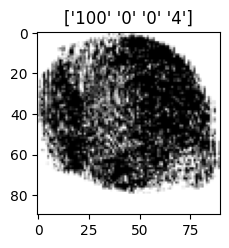

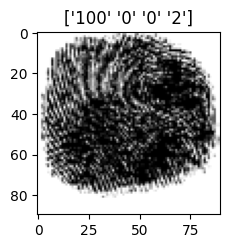

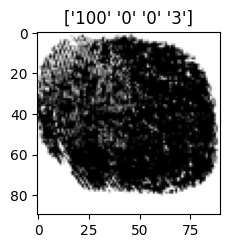

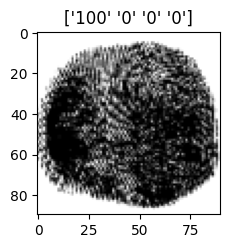

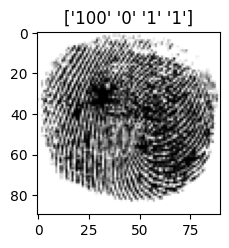

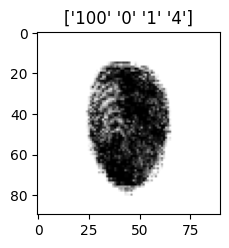

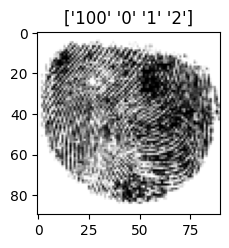

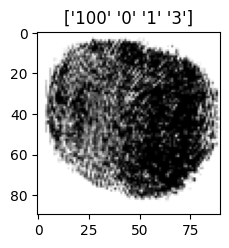

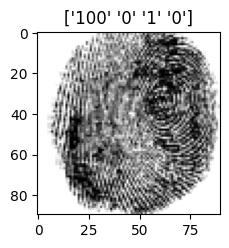

In [46]:
for i in range(len(image_data)):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 3, 1)
    plt.title(target_labels[i])
    plt.imshow(image_data[i].squeeze(),cmap='gray')

In [30]:
with open('our_images.npz', 'wb') as logo_file:
  np.save(logo_file, image_data)

In [31]:
with open('target.npy', 'wb') as logo_file:
  np.save(logo_file,target_labels )

In [47]:
X = np.load('D:/STUDY/Fouth Year/GP/test/our_images.npz')
Y = np.load('D:/STUDY/Fouth Year/GP/test/target.npy')

(90, 90, 1)


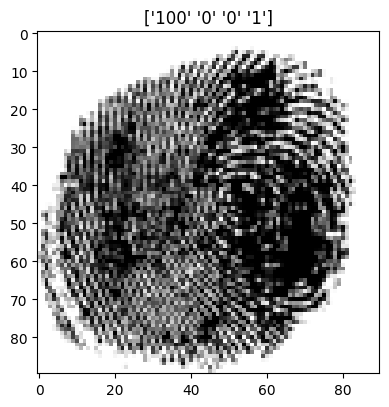

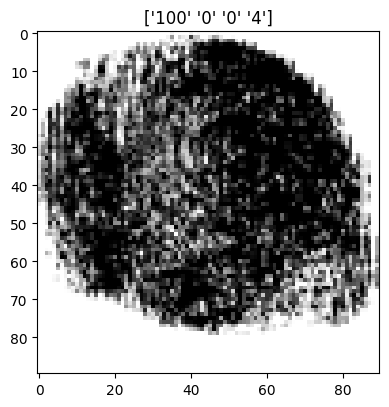

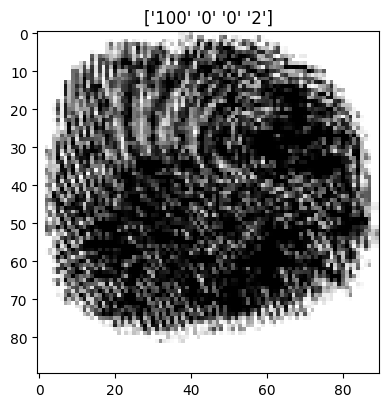

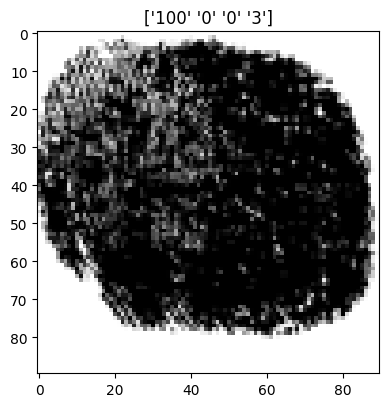

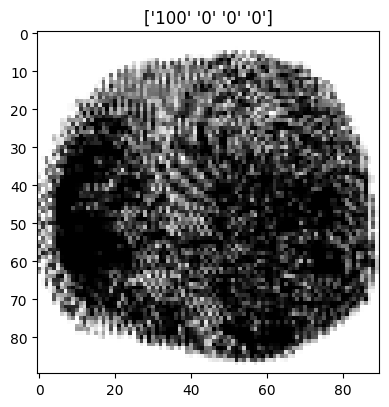

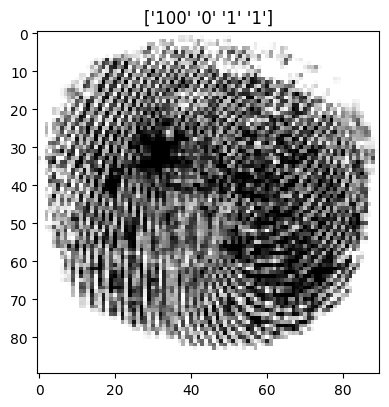

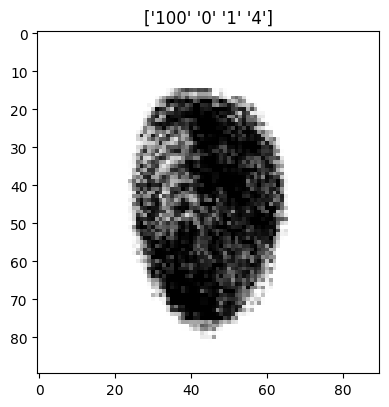

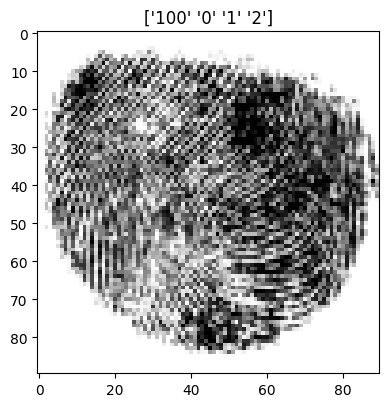

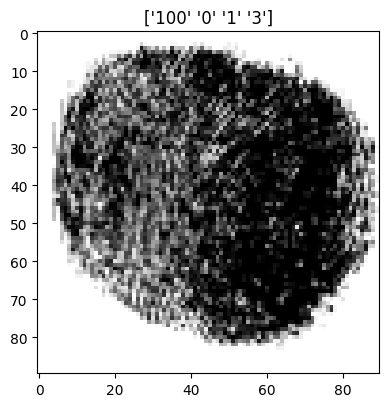

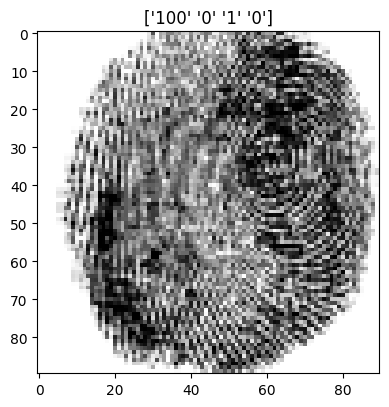

In [49]:
print(X[9].shape)
for i in range(len(X)):
    plt.figure(figsize=(15, 8))
    plt.subplot(1, 3, 1)
    plt.title(Y[i])
    plt.imshow(X[i].squeeze(),cmap='gray')